## 지수이동평균 (Exponential Moving Average)

- 단순 이동평균이 각 거래일의 종가에 동일한 가중치를 사용한다. 이와 달리 지수이동평균은 최근 데이터에 더 높은 가중치를 부여한다. 
- EMA는 단기 추세 및 상승과 하락 추세의 반전을 감지하는 데 특히 유용하다. 


EMA(i) = k * price(i) + (1-k) * EMA(i-1)


- price는 현재 가격(종가)이며 EMA(0)는 price(0)입니다. 가중치(평활 계수) k=2/(N+1)로 N은 이동평균의 탭 수
-  일반적으로 기간이 짧을수록 가중치가 높아진다
- 10일 지수 이동 평균을 구한다고 해보자. 먼저, 그 기간에 해당하는 평활계수 k의 값을 구한다.( k=2/(10+1)=0.18)
- 10일째 날의 10일 단순이동평균을 구한다.
- 11일째 날의 지수이동평균을 위의 공식으로 계산하되, 
- 전일 EMA는 앞의 2번째에서 계산한 단순이동평균을 대신 사용한다.
- 다음일자 부터는 위의 공식대로 계속하여 계산한다.

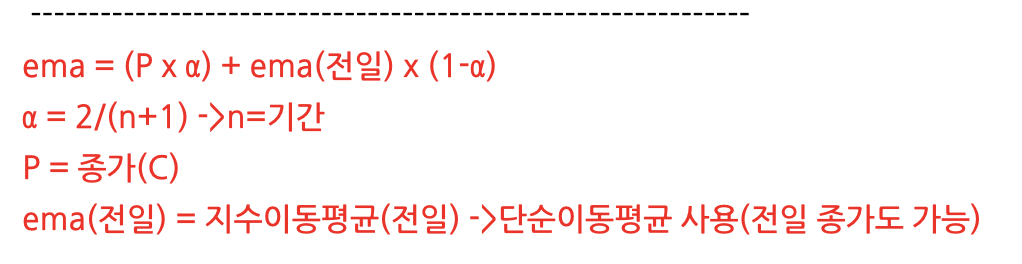

In [37]:
import FinanceDataReader as fdr
from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [12]:
today = datetime.today().strftime('%Y-%m-%d')

df = fdr.DataReader("005930", start="2022-1-1", end=today)

In [22]:
# pandas의 ewm 사용
df['Close'].ewm(span=3,adjust=False).mean()

Date
2022-01-03    78600.000000
2022-01-04    78650.000000
2022-01-05    78025.000000
2022-01-06    77462.500000
2022-01-07    77881.250000
                  ...     
2024-01-08    76703.912796
2024-01-09    75701.956398
2024-01-10    74650.978199
2024-01-11    73925.489100
2024-01-12    73512.744550
Name: Close, Length: 500, dtype: float64

-  adjust를 False로 할 경우, 등비수열의 합으로 이루어져 있는 분모를 일일이 계산하는게 아니라 무한등비급수의 공식을 적용하여 간단하게 계산한다. -> 데이터가 많을 때 사용하기 좋음 
- span은 기간


In [19]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2024-01-08,77000,77500,76400,76500,11088724,-0.001305
2024-01-09,77400,77700,74300,74700,26019249,-0.023529
2024-01-10,75000,75200,73200,73600,20259529,-0.014726


In [23]:
# min_periods는 해당 Dataframe에 요구하는 최소 기간
windows = [5, 10, 20, 60, 120]

for window in windows:
	# Normalization된 종가
    df['close_norm_ema{}'.format(window)] = \
    df['Close'].ewm(span = window, min_periods = window, adjust=False).mean()

In [24]:
df

,Open,High,Low,Close,Volume,Change,close_norm_ema5,close_norm_ema10,close_norm_ema20,close_norm_ema60,close_norm_ema120
Date,,,,,,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831,NaN,NaN,NaN,NaN,NaN
2022-01-04,78800,79200,78300,78700,12427416,0.001272,NaN,NaN,NaN,NaN,NaN
2022-01-05,78800,79000,76400,77400,25470640,-0.016518,NaN,NaN,NaN,NaN,NaN
2022-01-06,76700,77600,76600,76900,12931954,-0.006460,NaN,NaN,NaN,NaN,NaN
2022-01-07,78100,78400,77400,78300,15163757,0.018205,77954.320988,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-08,77000,77500,76400,76500,11088724,-0.001305,76854.443364,76543.148330,75455.939934,72846.262957,71024.377067
2024-01-09,77400,77700,74300,74700,26019249,-0.023529,76136.295576,76208.030452,75383.945654,72907.041221,71085.131165
2024-01-10,75000,75200,73200,73600,20259529,-0.014726,75290.863717,75733.843097,75214.046068,72929.761181,71126.699245


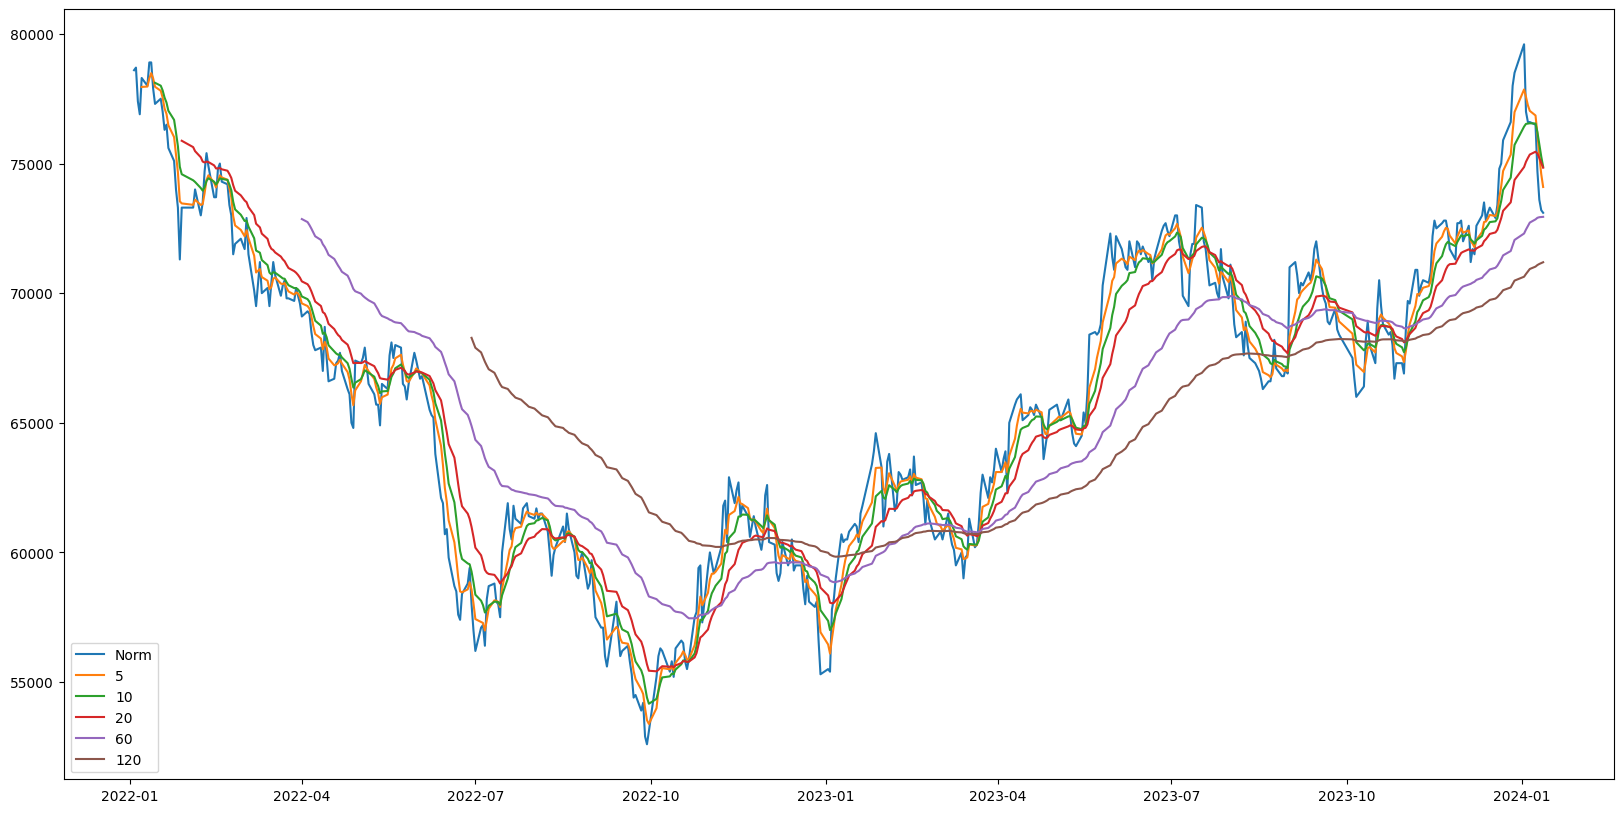

In [27]:
plt.figure(figsize=(20,10)) 
plt.plot(df['Close'], label = 'Norm')
for window in windows:
    plt.plot(df['close_norm_ema{}'.format(window)], label = window)
plt.legend()
plt.show()


- 1) 급격한 하락, 상승 구간에서 각 기간에 대한 EMA의 간격이 벌어진다.
- 2) 상승 구간에서는 EMA5가 EMA120을 항상 추월하는 교차점이 있다. 
- 3) 반대로 하락이 있기 전에는 항상, EMA5가 EMA120 보다 떨어지는 교차점이 존재한다.

 

## WMA (Welles Moving Average)

- RSI 지표를 계산할 때 사용하는 이동평균

df['close'].ewm(alpha=1/N, min_periods=N).mean()

-  RSI에서는 보통 14를 사용

## 전략 

#### 1) 지수이동평균선 정배열 매매법 by 영훈
- 10,20,50 이평선이 정배열을 이루는 우상향 수치가 나올때 ex) 10 = 440, 20 = 430, 50 = 420 

In [45]:
# window_list 는 3개만
def ema_straight_arrangement(code, window_list=[10, 20, 50], start_date="2018"):

    today = datetime.today().strftime('%Y-%m-%d')
    df = fdr.DataReader(code, start=start_date, end=today)[['Close']]
    for window in window_list:
        df['ema{}'.format(window)] = \
        df['Close'].ewm(span = window, min_periods = window, adjust=False).mean()
        
    df = df.dropna()
    
    df["straight"] = np.where((df[f'ema{window_list[0]}'] >= df[f'ema{window_list[1]}']) & ( df[f'ema{window_list[0]}'] >= df[f'ema{window_list[2]}']) & 
                              (df[f'ema{window_list[1]}'] >= df[f'ema{window_list[2]}']), 1, 0)
    
    
    plt.figure(figsize=(20,10)) 
    plt.plot(df['Close'], label = 'Norm')
    for window in window_list:
        plt.plot(df['ema{}'.format(window)], label = window)
    plt.legend()
    plt.show()
    
    return df

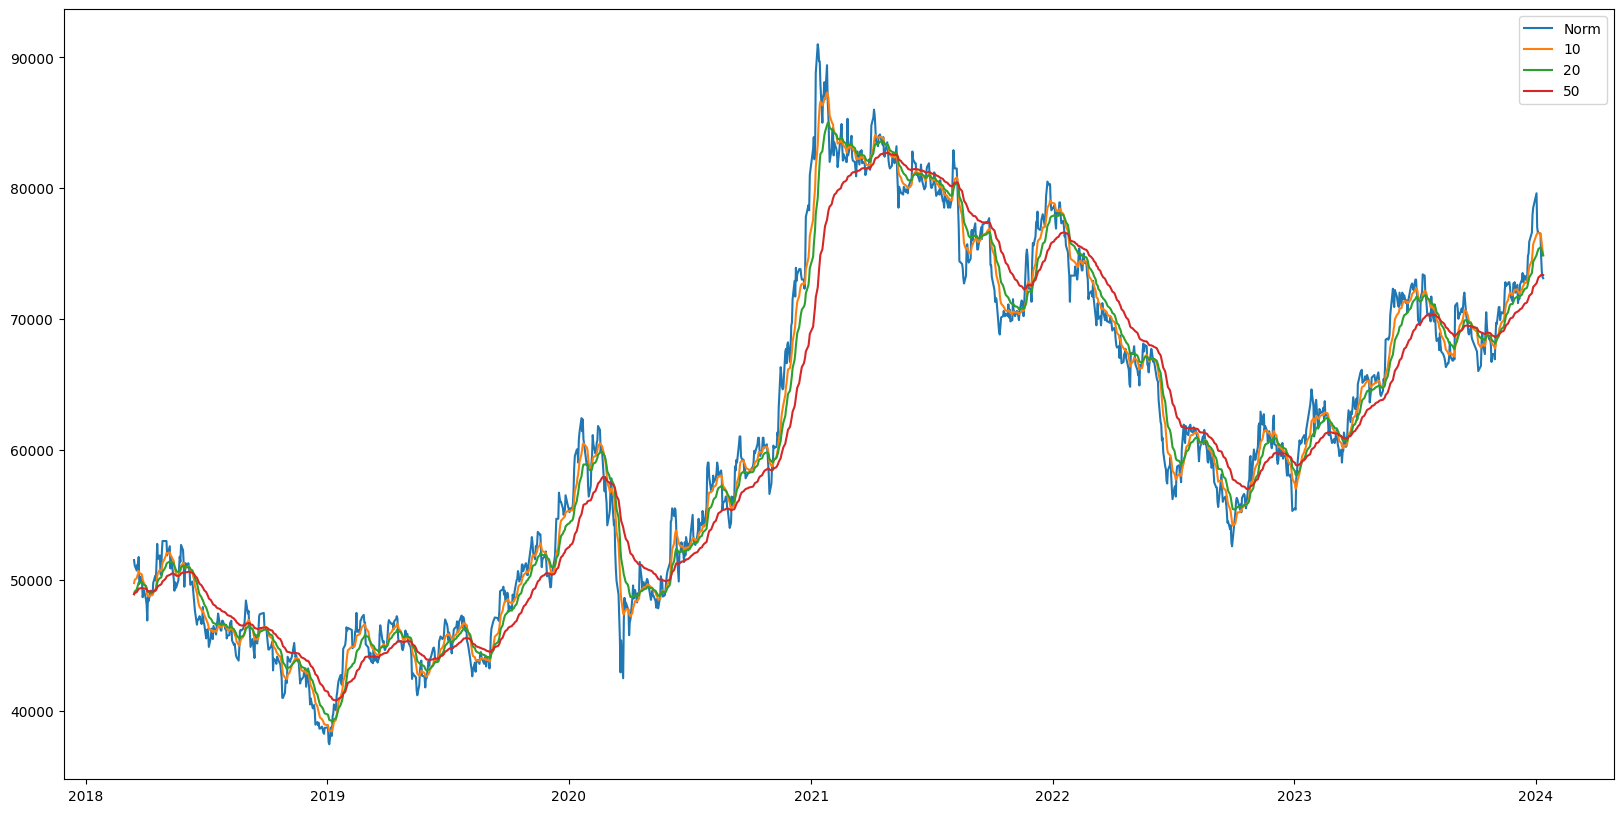

In [46]:
df = ema_straight_arrangement("005930")

In [48]:
df["straight"].value_counts()

straight
0    827
1    610
Name: count, dtype: int64

In [49]:
df

,Close,ema10,ema20,ema50,straight
Date,,,,,
2018-03-15,51540,49779.769925,48924.712066,48936.677001,0
2018-03-16,51140,50027.084484,49135.691870,49023.081825,1
2018-03-19,50740,50156.705487,49288.483120,49090.411949,1
2018-03-20,51200,50346.395399,49470.532347,49173.140892,1
2018-03-21,51060,50476.141690,49621.910219,49247.135367,1
...,...,...,...,...,...
2024-01-08,76500,76543.148330,75455.939934,73299.455646,1
2024-01-09,74700,76208.030452,75383.945654,73354.378954,1
2024-01-10,73600,75733.843097,75214.046068,73364.011152,1
